<a href="https://colab.research.google.com/github/autumnWindigo/GenAI/blob/main/HW6/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bash setup

## Download Music

In [1]:
!mkdir data
!curl -O http://www.jsbach.net/midi/cs1-1pre.mid -s && \
curl -O http://www.jsbach.net/midi/cs1-2all.mid -s && \
curl -O http://www.jsbach.net/midi/cs1-3cou.mid -s && \
curl -O http://www.jsbach.net/midi/cs1-4sar.mid -s && \
curl -O http://www.jsbach.net/midi/cs1-5men.mid -s && \
curl -O http://www.jsbach.net/midi/cs1-6gig.mid -s && \
curl -O http://www.jsbach.net/midi/cs2-1pre.mid -s && \
curl -O http://www.jsbach.net/midi/cs2-2all.mid -s && \
curl -O http://www.jsbach.net/midi/cs2-3cou.mid -s && \
curl -O http://www.jsbach.net/midi/cs2-4sar.mid -s && \
curl -O http://www.jsbach.net/midi/cs2-5men.mid -s && \
curl -O http://www.jsbach.net/midi/cs2-6gig.mid -s && \
curl -O http://www.jsbach.net/midi/cs3-1pre.mid -s && \
curl -O http://www.jsbach.net/midi/cs3-2all.mid -s && \
curl -O http://www.jsbach.net/midi/cs3-3cou.mid -s && \
curl -O http://www.jsbach.net/midi/cs3-4sar.mid -s && \
curl -O http://www.jsbach.net/midi/cs3-5bou.mid -s && \
curl -O http://www.jsbach.net/midi/cs3-6gig.mid -s && \
curl -O http://www.jsbach.net/midi/cs4-1pre.mid -s && \
curl -O http://www.jsbach.net/midi/cs4-2all.mid -s && \
curl -O http://www.jsbach.net/midi/cs4-3cou.mid -s && \
curl -O http://www.jsbach.net/midi/cs4-4sar.mid -s && \
curl -O http://www.jsbach.net/midi/cs4-5bou.mid -s && \
curl -O http://www.jsbach.net/midi/cs4-6gig.mid -s && \
curl -O http://www.jsbach.net/midi/cs5-1pre.mid -s && \
curl -O http://www.jsbach.net/midi/cs5-2all.mid -s && \
curl -O http://www.jsbach.net/midi/cs5-3cou.mid -s && \
curl -O http://www.jsbach.net/midi/cs5-4sar.mid -s && \
curl -O http://www.jsbach.net/midi/cs5-5gav.mid -s && \
curl -O http://www.jsbach.net/midi/cs5-6gig.mid -s && \
curl -O http://www.jsbach.net/midi/cs6-1pre.mid -s && \
curl -O http://www.jsbach.net/midi/cs6-2all.mid -s && \
curl -O http://www.jsbach.net/midi/cs6-3cou.mid -s && \
curl -O http://www.jsbach.net/midi/cs6-4sar.mid -s && \
curl -O http://www.jsbach.net/midi/cs6-5gav.mid -s && \
curl -O http://www.jsbach.net/midi/cs6-6gig.mid -s && \
echo 'Done!'


Done!


## Install needed programs

In [2]:
!apt-get install musescore
!apt-get install music21
!apt-get install fluidsynth
!pip install music21

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  desktop-file-utils fonts-freefont-ttf libevdev2 libgudev-1.0-0 libinput-bin libinput10 libmd4c0
  libmtdev1 libportaudio2 libportmidi0 libqt5core5a libqt5dbus5 libqt5gui5 libqt5help5
  libqt5network5 libqt5printsupport5 libqt5qml5 libqt5qmlmodels5 libqt5qmlworkerscript5
  libqt5quick5 libqt5sql5 libqt5sql5-sqlite libqt5svg5 libqt5widgets5 libqt5xml5 libqt5xmlpatterns5
  libwacom-bin libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1 libxkbcommon-x11-0
  musescore-common musescore-general-soundfont-small qml-module-qt-labs-folderlistmodel
  qml-module-qt-labs-settings qml-module-qtgraphicaleffects qml-module-qtqml
  qml-module-qtqml-models2 qml-module-qtquick-controls qml-module-qtquick-dialogs
  qml-module-qtquick-layouts qml-module-qtquick

## Move music to proper folder

In [3]:
!mv *.mid data

## Move transformer_utils to proper folder

In [4]:
!mkdir python
!mv transformer_utils.py python

In [5]:
import sys
sys.path.append('/content/python')

# Python

## Imports

In [6]:
import os
import glob
import numpy as np
import time
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, losses, callbacks

import music21

from transformer_utils import (
    parse_midi_files,
    load_parsed_files,
    get_midi_note,
    SinePositionEncoding,
)

## Params

In [7]:
PARSE_MIDI_FILES = True
PARSED_DATA_PATH = "/content/data/"
DATASET_REPETITIONS = 1

SEQ_LEN = 50
EMBEDDING_DIM = 256
KEY_DIM = 256
N_HEADS = 5
DROPOUT_RATE = 0.3
FEED_FORWARD_DIM = 256
LOAD_MODEL = False

# optimization
EPOCHS = 15
BATCH_SIZE = 256

GENERATE_LEN = 50

##Preparing Data

In [8]:
# Load the data
file_list = glob.glob("/content/data/*.mid")
print(f"Found {len(file_list)} midi files")

parser = music21.converter

example_score = (
    music21.converter.parse(file_list[1]).splitAtQuarterLength(12)[0].chordify()
)

example_score.show("text")



Found 36 midi files
{0.0} <music21.metadata.Metadata object at 0x796f06d8f2b0>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Violoncello 'Solo Cello: Solo Cello'>
    {0.0} <music21.instrument.Violoncello 'Violoncello'>
    {0.0} <music21.clef.BassClef>
    {0.0} <music21.tempo.MetronomeMark Quarter=250>
    {0.0} <music21.key.Key of D major>
    {0.0} <music21.meter.TimeSignature 3/4>
    {0.0} <music21.note.Rest 2.5ql>
    {2.5} <music21.tempo.MetronomeMark animato Quarter=120>
    {2.5} <music21.chord.Chord D4>
{3.0} <music21.stream.Measure 2 offset=3.0>
    {0.0} <music21.chord.Chord D4>
    {0.5} <music21.chord.Chord D3>
    {0.75} <music21.chord.Chord E3>
    {1.0} <music21.chord.Chord F#3>
    {1.5} <music21.chord.Chord D3>
    {2.0} <music21.chord.Chord A3>
    {2.5} <music21.chord.Chord F#3>
{6.0} <music21.stream.Measure 3 offset=6.0>
    {0.0} <music21.chord.Chord D4>
    {0.5} <music21.chord.Chord A3>
    {1.0} <music21.chord.Chord F#4>
    {1.5} 

In [9]:
if PARSE_MIDI_FILES:
    notes, durations = parse_midi_files(
        file_list, parser, SEQ_LEN + 1, PARSED_DATA_PATH
    )
else:
    notes, durations = load_parsed_files()

1 Parsing /content/data/cs1-2all.mid


<ipython-input-9-04172d0f16ff>:2: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  notes, durations = parse_midi_files(


921 notes parsed
2 Parsing /content/data/cs6-3cou.mid
2207 notes parsed
3 Parsing /content/data/cs4-2all.mid
3262 notes parsed
4 Parsing /content/data/cs5-6gig.mid
3711 notes parsed
5 Parsing /content/data/cs3-5bou.mid
4592 notes parsed
6 Parsing /content/data/cs3-1pre.mid
5573 notes parsed
7 Parsing /content/data/cs3-4sar.mid
5914 notes parsed
8 Parsing /content/data/cs5-4sar.mid
6133 notes parsed
9 Parsing /content/data/cs3-6gig.mid
7094 notes parsed
10 Parsing /content/data/cs6-4sar.mid
7429 notes parsed
11 Parsing /content/data/cs3-3cou.mid
8418 notes parsed
12 Parsing /content/data/cs2-2all.mid
9111 notes parsed
13 Parsing /content/data/cs5-3cou.mid
9541 notes parsed
14 Parsing /content/data/cs1-3cou.mid
10361 notes parsed
15 Parsing /content/data/cs4-1pre.mid
11178 notes parsed
16 Parsing /content/data/cs2-4sar.mid
11515 notes parsed
17 Parsing /content/data/cs5-5gav.mid
12717 notes parsed
18 Parsing /content/data/cs3-2all.mid
13454 notes parsed
19 Parsing /content/data/cs5-2all.

In [10]:
example_notes = notes[658]
example_durations = durations[658]
print("\nNotes string\n", example_notes, "...")
print("\nDuration string\n", example_durations, "...")


Notes string
 G3 B3 C4 G3 E3 D3 C3 E3 A3 C4 F#3 A3 C4 E4 D4 C3 B2 G3 A2 G2 D2 A2 G3 F#3 G3 G2 B2 D3 G3 B3 D4 F#4 G4 D4 B3 G3 G2 A3 A3 F#3 G3 A3 D3 E3 F#3 G3 A3 F#3 D3 C3 B2 ...

Duration string
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.75 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.75 0.25 1.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...


##Tokenization

In [11]:
def create_dataset(elements):
    ds = (
        tf.data.Dataset.from_tensor_slices(elements)
        .batch(BATCH_SIZE, drop_remainder=True)
        .shuffle(1000)
    )
    vectorize_layer = layers.TextVectorization(
        standardize=None, output_mode="int"
    )
    vectorize_layer.adapt(ds)
    vocab = vectorize_layer.get_vocabulary()
    return ds, vectorize_layer, vocab


notes_seq_ds, notes_vectorize_layer, notes_vocab = create_dataset(notes)
durations_seq_ds, durations_vectorize_layer, durations_vocab = create_dataset(
    durations
)
seq_ds = tf.data.Dataset.zip((notes_seq_ds, durations_seq_ds))


In [12]:
# Display the same example notes and durations converted to ints
example_tokenised_notes = notes_vectorize_layer(example_notes)
example_tokenised_durations = durations_vectorize_layer(example_durations)
print("{:10} {:10}".format("note token", "duration token"))
for i, (note_int, duration_int) in enumerate(
    zip(
        example_tokenised_notes.numpy()[:11],
        example_tokenised_durations.numpy()[:11],
    )
):
    print(f"{note_int:10}{duration_int:10}")

note token duration token
         2         2
         9         2
         6         2
         2         2
         8         2
         4         2
        13         2
         8         2
         3         2
         6         2
        12         2


In [13]:
notes_vocab_size = len(notes_vocab)
durations_vocab_size = len(durations_vocab)

# Display some token:note mappings
print(f"\nNOTES_VOCAB: length = {len(notes_vocab)}")
for i, note in enumerate(notes_vocab[:10]):
    print(f"{i}: {note}")

print(f"\nDURATIONS_VOCAB: length = {len(durations_vocab)}")
# Display some token:duration mappings
for i, note in enumerate(durations_vocab[:10]):
    print(f"{i}: {note}")




NOTES_VOCAB: length = 59
0: 
1: [UNK]
2: G3
3: A3
4: D3
5: F3
6: C4
7: D4
8: E3
9: B3

DURATIONS_VOCAB: length = 24
0: 
1: [UNK]
2: 0.25
3: 0.5
4: 1.0
5: 1/3
6: 0.75
7: 1/12
8: 1.5
9: 0.0


##Creating Training Set

In [14]:
# Create the training set of sequences and the same sequences shifted by one note
def prepare_inputs(notes, durations):
    notes = tf.expand_dims(notes, -1)
    durations = tf.expand_dims(durations, -1)
    tokenized_notes = notes_vectorize_layer(notes)
    tokenized_durations = durations_vectorize_layer(durations)
    x = (tokenized_notes[:, :-1], tokenized_durations[:, :-1])
    y = (tokenized_notes[:, 1:], tokenized_durations[:, 1:])
    return x, y


ds = seq_ds.map(prepare_inputs).repeat(DATASET_REPETITIONS)

In [15]:
example_input_output = ds.take(1).get_single_element()
print(example_input_output)

((<tf.Tensor: shape=(256, 50), dtype=int64, numpy=
array([[ 4,  4,  8, ..., 21, 21, 21],
       [ 4,  8, 19, ..., 21, 21, 25],
       [ 8, 19, 26, ..., 21, 25, 25],
       ...,
       [25, 25, 47, ...,  6,  6,  3],
       [25, 47, 25, ...,  6,  3,  9],
       [47, 25, 15, ...,  3,  9, 21]])>, <tf.Tensor: shape=(256, 50), dtype=int64, numpy=
array([[ 6,  2,  2, ...,  2,  2,  3],
       [ 2,  2,  2, ...,  2,  3, 10],
       [ 2,  2,  2, ...,  3, 10,  7],
       ...,
       [ 2,  2,  2, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  2,  2,  2],
       [ 2,  2,  6, ...,  2,  2,  2]])>), (<tf.Tensor: shape=(256, 50), dtype=int64, numpy=
array([[ 4,  8, 19, ..., 21, 21, 25],
       [ 8, 19, 26, ..., 21, 25, 25],
       [19, 26, 21, ..., 25, 25, 25],
       ...,
       [25, 47, 25, ...,  6,  3,  9],
       [47, 25, 15, ...,  3,  9, 21],
       [25, 15, 15, ...,  9, 21, 25]])>, <tf.Tensor: shape=(256, 50), dtype=int64, numpy=
array([[ 2,  2,  2, ...,  2,  3, 10],
       [ 2,  2,  2, ...,  3, 10, 

##Casual Attention Mask Function

In [16]:
def causal_attention_mask(batch_size, n_dest, n_src, dtype):
    i = tf.range(n_dest)[:, None]
    j = tf.range(n_src)
    m = i >= j - n_src + n_dest
    mask = tf.cast(m, dtype)
    mask = tf.reshape(mask, [1, n_dest, n_src])
    mult = tf.concat(
        [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)], 0
    )
    return tf.tile(mask, mult)


np.transpose(causal_attention_mask(1, 10, 10, dtype=tf.int32)[0])

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int32)

##Transformer Block Layer

In [17]:
class TransformerBlock(layers.Layer):
    def __init__(
        self,
        num_heads,
        key_dim,
        embed_dim,
        ff_dim,
        name,
        dropout_rate=DROPOUT_RATE,
    ):
        super(TransformerBlock, self).__init__(name=name)
        self.num_heads = num_heads
        self.key_dim = key_dim
        self.embed_dim = embed_dim
        self.ff_dim = ff_dim
        self.dropout_rate = dropout_rate
        self.attn = layers.MultiHeadAttention(
            num_heads, key_dim, output_shape=embed_dim
        )
        self.dropout_1 = layers.Dropout(self.dropout_rate)
        self.ln_1 = layers.LayerNormalization(epsilon=1e-6)
        self.ffn_1 = layers.Dense(self.ff_dim, activation="relu")
        self.ffn_2 = layers.Dense(self.embed_dim)
        self.dropout_2 = layers.Dropout(self.dropout_rate)
        self.ln_2 = layers.LayerNormalization(epsilon=1e-6)

    def call(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        seq_len = input_shape[1]
        causal_mask = causal_attention_mask(
            batch_size, seq_len, seq_len, tf.bool
        )
        attention_output, attention_scores = self.attn(
            inputs,
            inputs,
            attention_mask=causal_mask,
            return_attention_scores=True,
        )
        attention_output = self.dropout_1(attention_output)
        out1 = self.ln_1(inputs + attention_output)
        ffn_1 = self.ffn_1(out1)
        ffn_2 = self.ffn_2(ffn_1)
        ffn_output = self.dropout_2(ffn_2)
        return (self.ln_2(out1 + ffn_output), attention_scores)

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "key_dim": self.key_dim,
                "embed_dim": self.embed_dim,
                "num_heads": self.num_heads,
                "ff_dim": self.ff_dim,
                "dropout_rate": self.dropout_rate,
            }
        )
        return config

##Token and Position Embedding

In [18]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.token_emb = layers.Embedding(
            input_dim=vocab_size,
            output_dim=embed_dim,
            embeddings_initializer="he_uniform",
        )
        self.pos_emb = SinePositionEncoding()

    def call(self, x):
        embedding = self.token_emb(x)
        positions = self.pos_emb(embedding)
        return embedding + positions

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "vocab_size": self.vocab_size,
                "embed_dim": self.embed_dim,
            }
        )
        return config

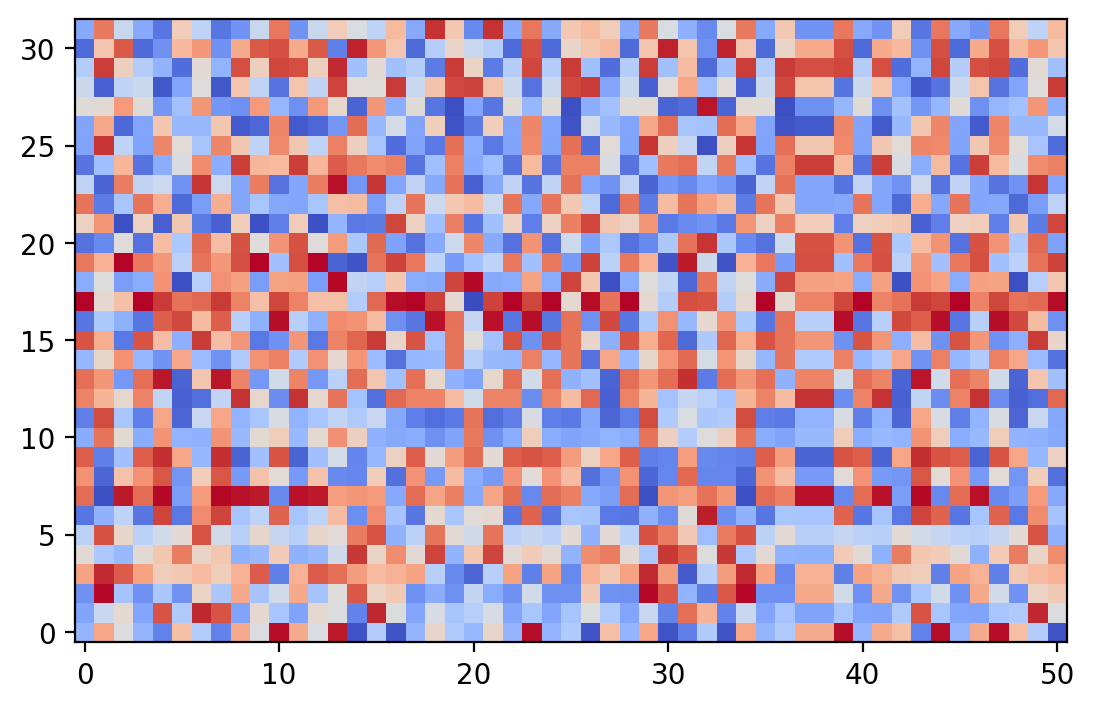

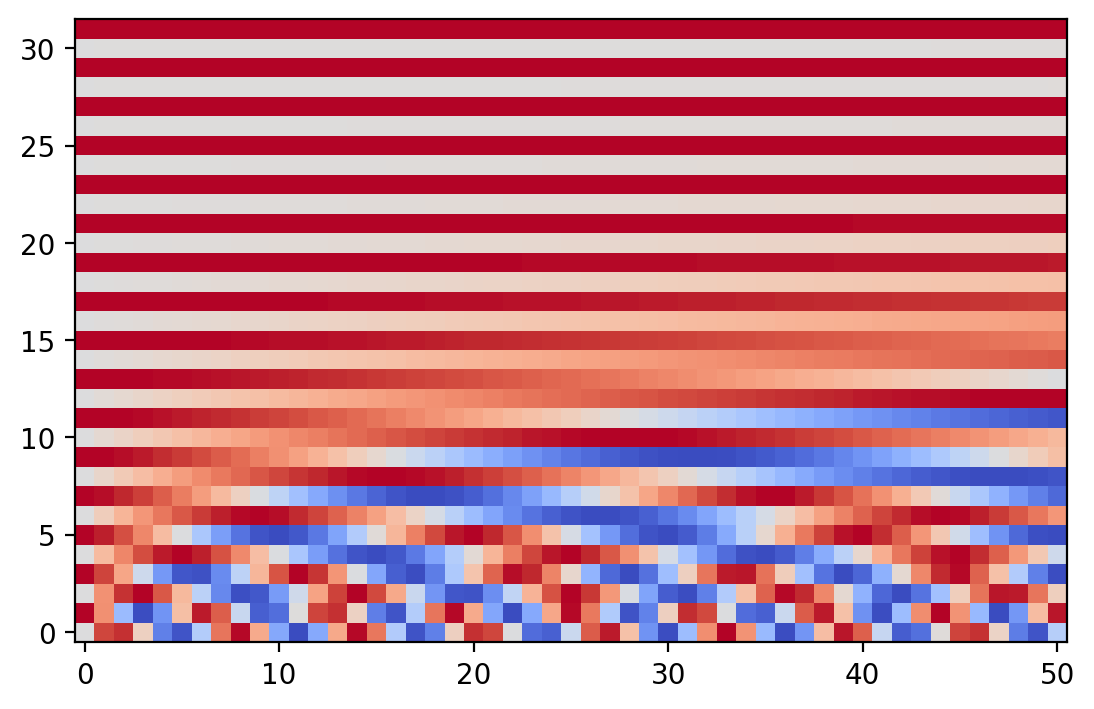

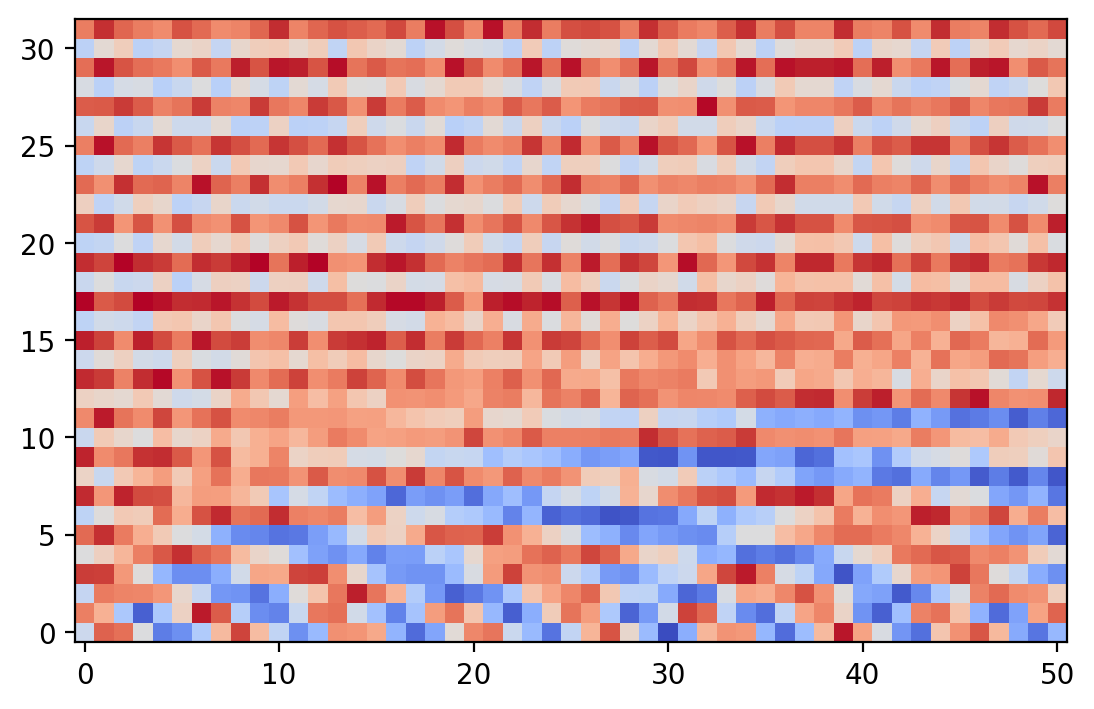

In [19]:
tpe = TokenAndPositionEmbedding(notes_vocab_size, 32)
token_embedding = tpe.token_emb(example_tokenised_notes)
position_embedding = tpe.pos_emb(token_embedding)
embedding = tpe(example_tokenised_notes)
plt.imshow(
    np.transpose(token_embedding),
    cmap="coolwarm",
    interpolation="nearest",
    origin="lower",
)
plt.show()
plt.imshow(
    np.transpose(position_embedding),
    cmap="coolwarm",
    interpolation="nearest",
    origin="lower",
)
plt.show()
plt.imshow(
    np.transpose(embedding),
    cmap="coolwarm",
    interpolation="nearest",
    origin="lower",
)
plt.show()

##Build the Transformer Model

In [20]:
note_inputs = layers.Input(shape=(None,), dtype=tf.int32)
durations_inputs = layers.Input(shape=(None,), dtype=tf.int32)
note_embeddings = TokenAndPositionEmbedding(
    notes_vocab_size, EMBEDDING_DIM // 2
)(note_inputs)
duration_embeddings = TokenAndPositionEmbedding(
    durations_vocab_size, EMBEDDING_DIM // 2
)(durations_inputs)
embeddings = layers.Concatenate()([note_embeddings, duration_embeddings])
x, attention_scores = TransformerBlock(
    N_HEADS, KEY_DIM, EMBEDDING_DIM, FEED_FORWARD_DIM, name="attention"
)(embeddings)
note_outputs = layers.Dense(
    notes_vocab_size, activation="softmax", name="note_outputs"
)(x)
duration_outputs = layers.Dense(
    durations_vocab_size, activation="softmax", name="duration_outputs"
)(x)
model = models.Model(
    inputs=[note_inputs, durations_inputs],
    outputs=[note_outputs, duration_outputs],  # attention_scores
)
model.compile(
    "adam",
    loss=[
        losses.SparseCategoricalCrossentropy(),
        losses.SparseCategoricalCrossentropy(),
    ],
)
att_model = models.Model(
    inputs=[note_inputs, durations_inputs], outputs=attention_scores
)


In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 token_and_position_embeddi  (None, None, 128)            7552      ['input_1[0][0]']             
 ng_1 (TokenAndPositionEmbe                                                                       
 dding)                                                                                           
                                                                                              

##Training Transformer

In [22]:
# Create a MusicGenerator checkpoint
class MusicGenerator(callbacks.Callback):
    def __init__(self, index_to_note, index_to_duration, top_k=10):
        self.index_to_note = index_to_note
        self.note_to_index = {
            note: index for index, note in enumerate(index_to_note)
        }
        self.index_to_duration = index_to_duration
        self.duration_to_index = {
            duration: index for index, duration in enumerate(index_to_duration)
        }

    def sample_from(self, probs, temperature):
        probs = probs ** (1 / temperature)
        probs = probs / np.sum(probs)
        return np.random.choice(len(probs), p=probs), probs

    def get_note(self, notes, durations, temperature):
        sample_note_idx = 1
        while sample_note_idx == 1:
            sample_note_idx, note_probs = self.sample_from(
                notes[0][-1], temperature
            )
            sample_note = self.index_to_note[sample_note_idx]

        sample_duration_idx = 1
        while sample_duration_idx == 1:
            sample_duration_idx, duration_probs = self.sample_from(
                durations[0][-1], temperature
            )
            sample_duration = self.index_to_duration[sample_duration_idx]

        new_note = get_midi_note(sample_note, sample_duration)

        return (
            new_note,
            sample_note_idx,
            sample_note,
            note_probs,
            sample_duration_idx,
            sample_duration,
            duration_probs,
        )

    def generate(self, start_notes, start_durations, max_tokens, temperature):
        attention_model = models.Model(
            inputs=self.model.input,
            outputs=self.model.get_layer("attention").output,
        )

        start_note_tokens = [self.note_to_index.get(x, 1) for x in start_notes]
        start_duration_tokens = [
            self.duration_to_index.get(x, 1) for x in start_durations
        ]
        sample_note = None
        sample_duration = None
        info = []
        midi_stream = music21.stream.Stream()

        midi_stream.append(music21.clef.BassClef())

        for sample_note, sample_duration in zip(start_notes, start_durations):
            new_note = get_midi_note(sample_note, sample_duration)
            if new_note is not None:
                midi_stream.append(new_note)

        while len(start_note_tokens) < max_tokens:
            x1 = np.array([start_note_tokens])
            x2 = np.array([start_duration_tokens])
            notes, durations = self.model.predict([x1, x2], verbose=0)

            repeat = True

            while repeat:
                (
                    new_note,
                    sample_note_idx,
                    sample_note,
                    note_probs,
                    sample_duration_idx,
                    sample_duration,
                    duration_probs,
                ) = self.get_note(notes, durations, temperature)

                if (
                    isinstance(new_note, music21.chord.Chord)
                    or isinstance(new_note, music21.note.Note)
                    or isinstance(new_note, music21.note.Rest)
                ) and sample_duration == "0.0":
                    repeat = True
                else:
                    repeat = False

            if new_note is not None:
                midi_stream.append(new_note)

            _, att = attention_model.predict([x1, x2], verbose=0)

            info.append(
                {
                    "prompt": [start_notes.copy(), start_durations.copy()],
                    "midi": midi_stream,
                    "chosen_note": (sample_note, sample_duration),
                    "note_probs": note_probs,
                    "duration_probs": duration_probs,
                    "atts": att[0, :, -1, :],
                }
            )
            start_note_tokens.append(sample_note_idx)
            start_duration_tokens.append(sample_duration_idx)
            start_notes.append(sample_note)
            start_durations.append(sample_duration)

            if sample_note == "START":
                break

        return info

    def on_epoch_end(self, epoch, logs=None):
        info = self.generate(
            ["START"], ["0.0"], max_tokens=GENERATE_LEN, temperature=0.5
        )
        midi_stream = info[-1]["midi"].chordify()
        print(info[-1]["prompt"])
        #midi_stream.show()
        midi_stream.write(
            "midi",
            fp=os.path.join(
                "/content/output",
                "output-" + str(epoch).zfill(4) + ".mid",
            ),
        )


In [23]:
# Tokenize starting prompt
music_generator = MusicGenerator(notes_vocab, durations_vocab)

In [25]:
!mkdir output

model.fit(
    ds,
    epochs=EPOCHS,
    callbacks=[
        music_generator,
    ],
)

mkdir: cannot create directory ‘logdir’: File exists
Epoch 1/15
107/107 [==============================] - 365s 3s/step - loss: 4.0444 - note_outputs_loss: 3.2569 - duration_outputs_loss: 0.7875
Epoch 2/15
107/107 [==============================] - 363s 3s/step - loss: 3.5772 - note_outputs_loss: 2.9072 - duration_outputs_loss: 0.6700
Epoch 3/15
107/107 [==============================] - 361s 3s/step - loss: 3.3532 - note_outputs_loss: 2.7065 - duration_outputs_loss: 0.6467
Epoch 4/15
107/107 [==============================] - 362s 3s/step - loss: 3.2173 - note_outputs_loss: 2.6154 - duration_outputs_loss: 0.6019
Epoch 5/15
107/107 [==============================] - 362s 3s/step - loss: 3.1754 - note_outputs_loss: 2.5551 - duration_outputs_loss: 0.6203
Epoch 6/15
107/107 [==============================] - 364s 3s/step - loss: 3.0681 - note_outputs_loss: 2.4997 - duration_outputs_loss: 0.5684
Epoch 7/15
107/107 [==============================] - 367s 3s/step - loss: 3.0402 - note_output

In [26]:
# Save the final model
model.save("/content/model")

#Generating Music

In [41]:
info = music_generator.generate(
    ["START"], ["0.0"], max_tokens=50, temperature=0.9
)
midi_stream = info[-1]["midi"].chordify()
#midi_stream.show()

##Write music to MIDI file

In [42]:
!mkdir transformer_output

timestr = time.strftime("%Y%m%d-%H%M%S")
midi_stream.write(
    "midi",
    fp=os.path.join(
        "/content/transformer_output",
        "output-" + timestr + ".mid",
    ),
)

mkdir: cannot create directory ‘transformer_output’: File exists


'/content/transformer_output/output-20241209-002315.mid'

##Note probabilities

In [43]:
max_pitch = 70
seq_len = len(info)
grid = np.zeros((max_pitch, seq_len), dtype=np.float32)

for j in range(seq_len):
    for i, prob in enumerate(info[j]["note_probs"]):
        try:
            pitch = music21.note.Note(notes_vocab[i]).pitch.midi
            grid[pitch, j] = prob
        except:
            pass  # Don't show key / time signatures

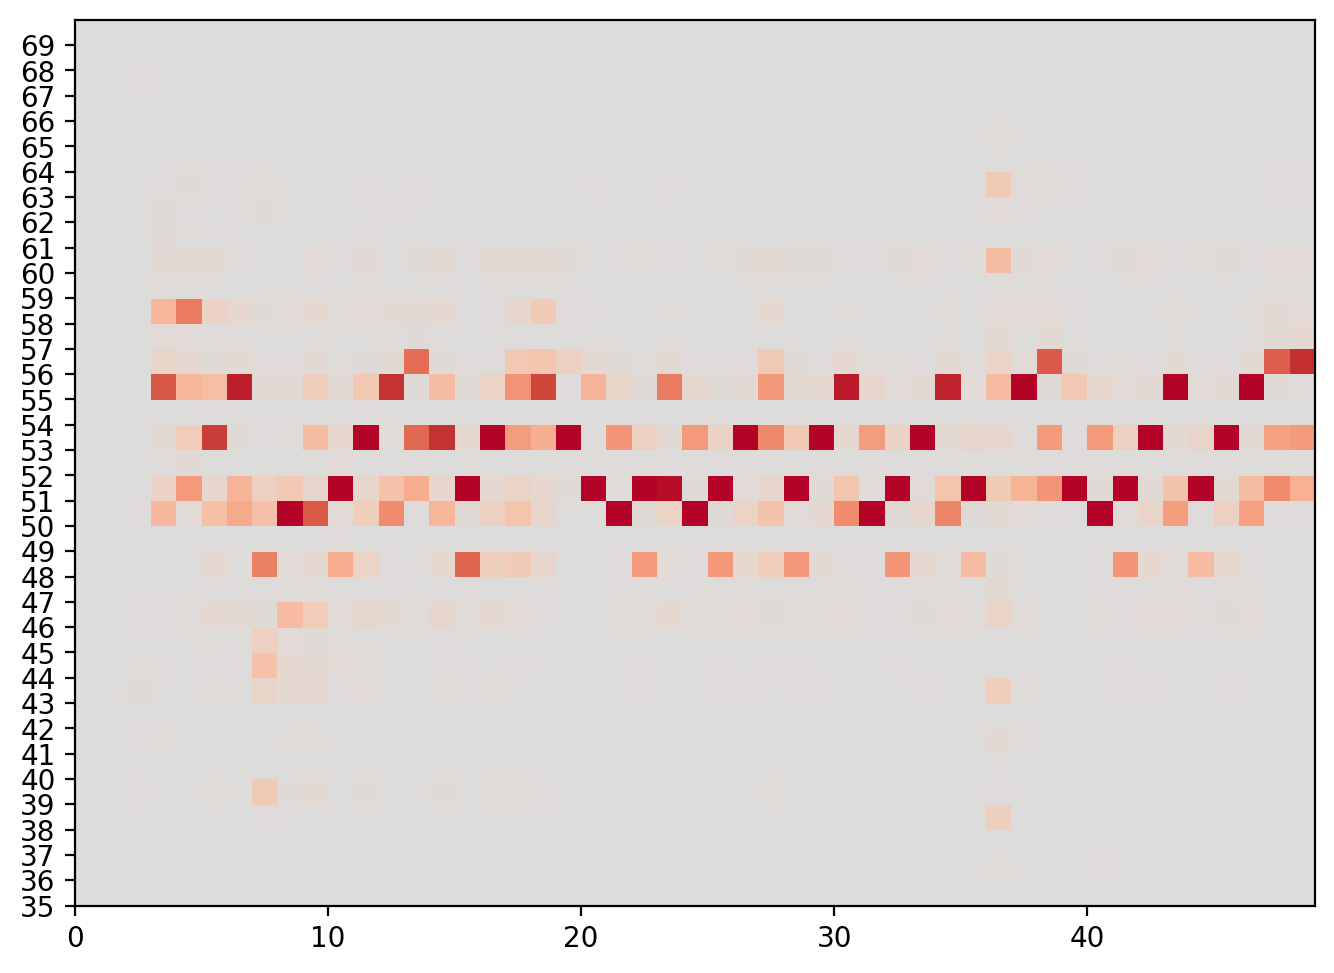

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_yticks([int(j) for j in range(35, 70)])
plt.imshow(
    grid[35:70, :],
    origin="lower",
    cmap="coolwarm",
    vmin=-0.5,
    vmax=0.5,
    extent=[0, seq_len, 35, 70],
)
plt.show()

##Attention Plot

In [46]:
plot_size = 20

att_matrix = np.zeros((plot_size, plot_size))
prediction_output = []
last_prompt = []

In [47]:
for j in range(plot_size):
    atts = info[j]["atts"].max(axis=0)
    att_matrix[: (j + 1), j] = atts
    prediction_output.append(info[j]["chosen_note"][0])
    last_prompt.append(info[j]["prompt"][0][-1])

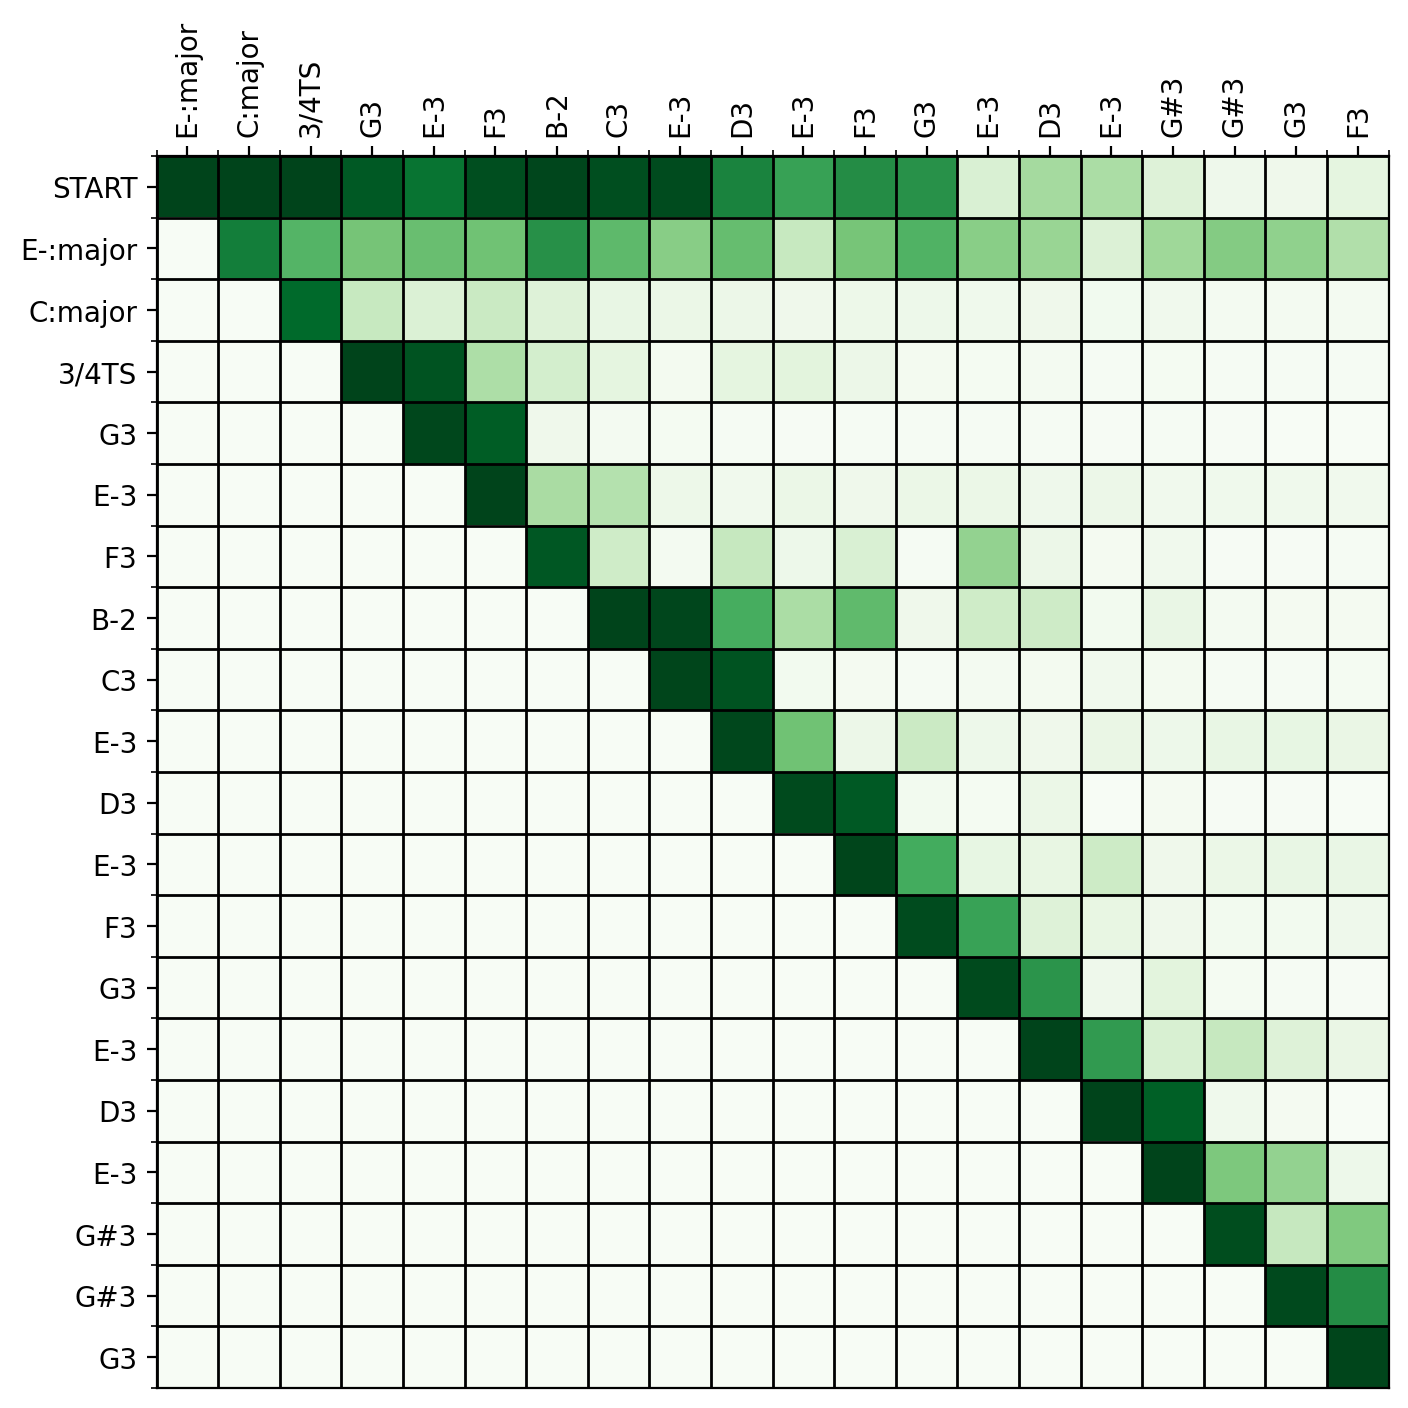

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(att_matrix, cmap="Greens", interpolation="nearest")

ax.set_xticks(np.arange(-0.5, plot_size, 1), minor=True)
ax.set_yticks(np.arange(-0.5, plot_size, 1), minor=True)
ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
ax.set_xticks(np.arange(plot_size))
ax.set_yticks(np.arange(plot_size))
ax.set_xticklabels(prediction_output[:plot_size])
ax.set_yticklabels(last_prompt[:plot_size])
ax.xaxis.tick_top()

plt.setp(
    ax.get_xticklabels(),
    rotation=90,
    ha="left",
    va="center",
    rotation_mode="anchor",
)
plt.show()

##Save Everything

In [49]:
from google.colab import files
import shutil

shutil.make_archive("/content/model", 'zip', "my_folder")
shutil.make_archive("/content/output", 'zip', "my_folder")
shutil.make_archive("/content/transformer_output", 'zip', "my_folder")
shutil.make_archive("/content/data", 'zip', "my_folder")

'/content/data.zip'

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
# Saving the model and its data on the Google drive

!cp -r /content/data /content/drive/MyDrive/GenAI2
!cp -r /content/model /content/drive/MyDrive/GenAI2
!cp -r /content/output /content/drive/MyDrive/GenAI2
!cp -r /content/transformer_output /content/drive/MyDrive/GenAI2

In [51]:
# Save model for further training
!zip part_model.zip /content/model

  adding: content/model/ (stored 0%)
